In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  #colormap package
%matplotlib inline

In [2]:
#importing algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score #subpackage

In [3]:
#import the dataset
training_data = pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [4]:
#Visualizing the dataset shape (rows,columns)
print("Training data: {}".format(training_data.shape)) 
print("Test data: {}".format(test_data.shape))

Training data: (7352, 563)
Test data: (2947, 563)


In [5]:
#lets watch first 10 rows of training data
training_data.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING


In [6]:
#Now we get X and y for training data
X_train = training_data.drop(columns=['Activity','subject'])
y_train = training_data['Activity']

In [7]:
#Now we get X and y for test data
X_test = test_data.drop(columns=['Activity','subject'])
y_test = test_data['Activity']

In [8]:
# Count the number of records for each activity
count_of_each_activity = np.array(y_train.value_counts())

In [9]:
# Identify all the unqiue activities and in sorted order
activities = sorted(y_train.unique())

([<matplotlib.patches.Wedge at 0x1dacd05c248>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

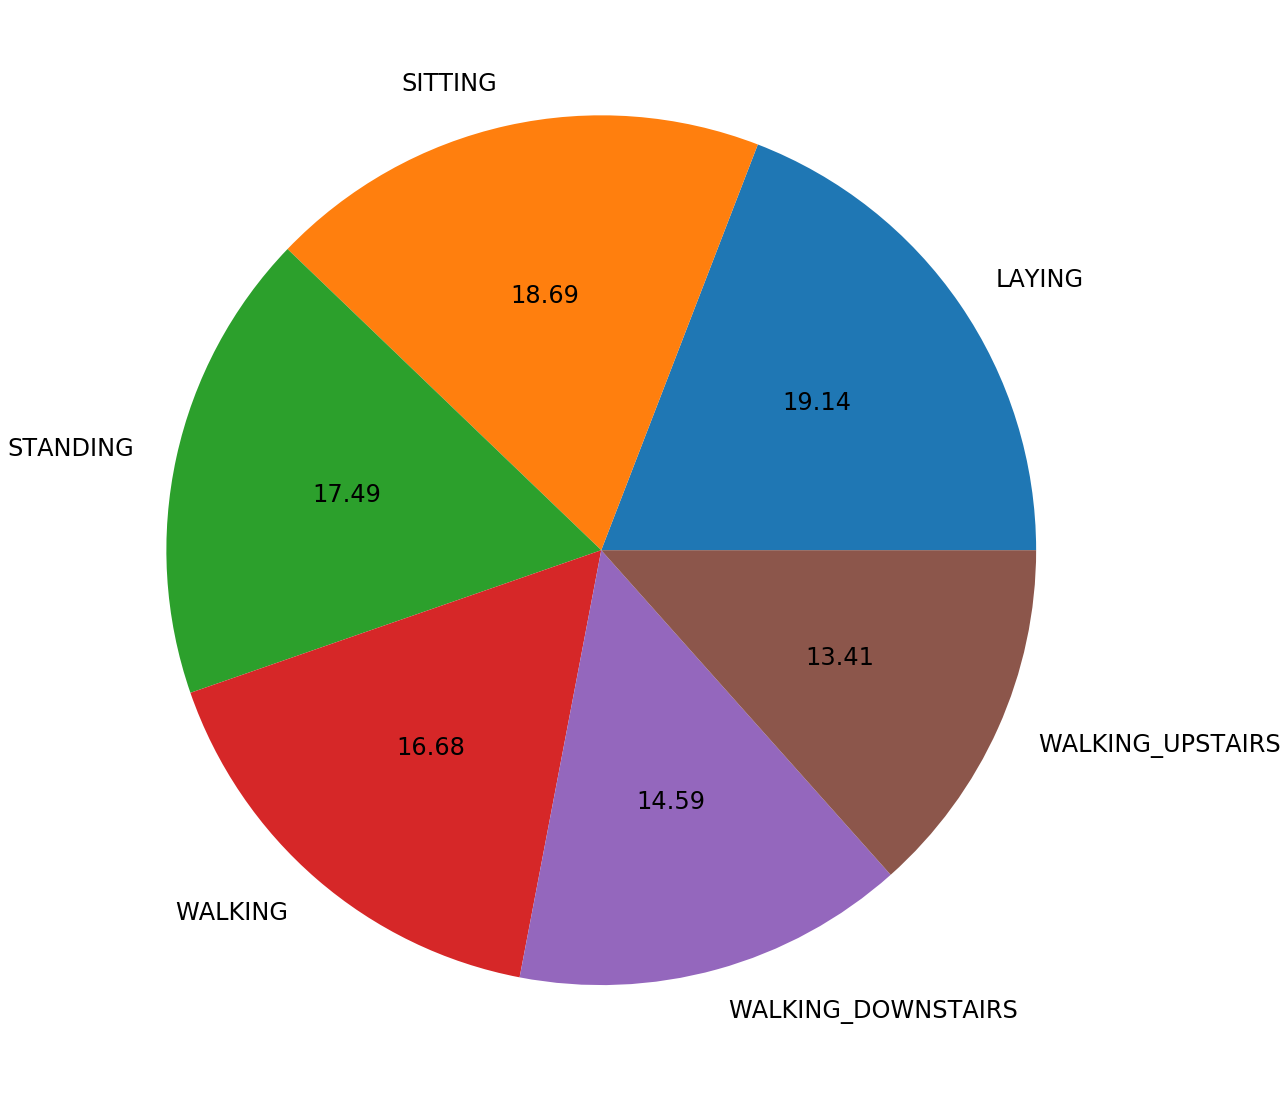

In [10]:
# Lets lot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [20, 20], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

In [11]:
#now lets see the count of each type
acc=0
gyro=0
others=0
for column in X_train.columns:
    if 'Acc' in str(column):
        acc+=1
    elif 'Gyro' in str(column):
        gyro+=1
    else:
        others+=1

<BarContainer object of 3 artists>

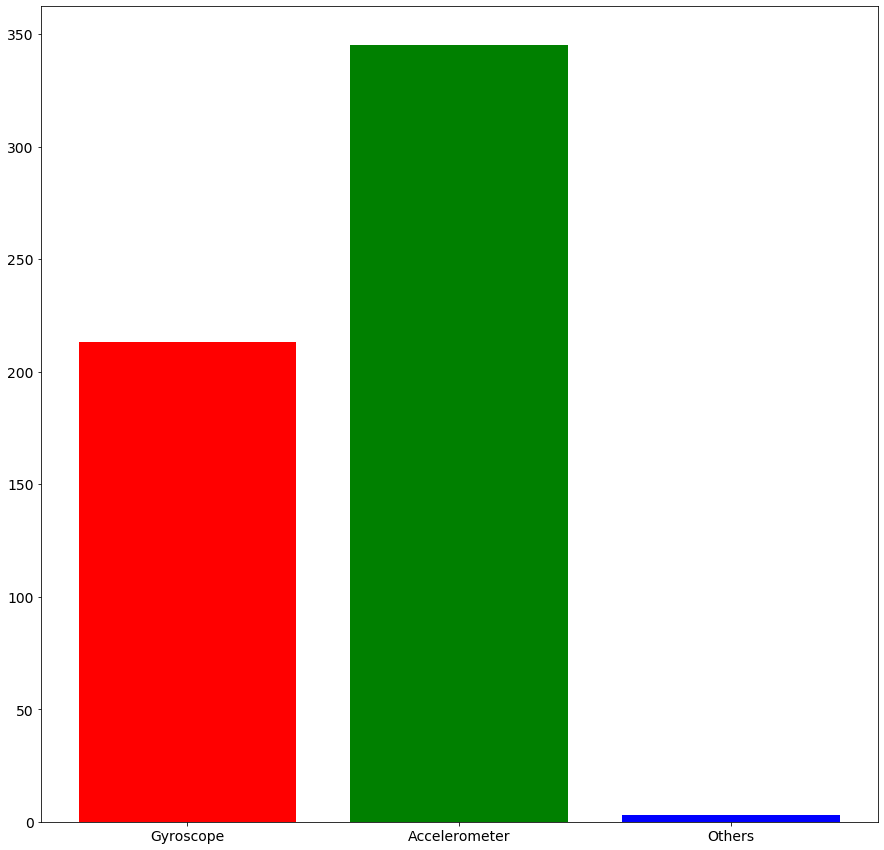

In [12]:
#plot the bar graph for the three types
plt.rcParams.update({'figure.figsize':[15,15],'font.size':14})
plt.bar(['Gyroscope','Accelerometer','Others'],[gyro,acc,others],color=('r','g','b'))

In [13]:
sitting_activity = training_data[training_data['Activity'] == 'SITTING']
sitting_activity = sitting_activity.reset_index(drop=True)

In [14]:
#let set the time series for each subject
time=1
index=0
time_series = np.zeros(sitting_activity.shape[0])
for row_number in range(sitting_activity.shape[0]):
    if (row_number == 0 
        or sitting_activity.iloc[row_number]['subject'] == sitting_activity.iloc[row_number - 1]['subject']):
        time_series[index] = time
        time += 1
    else:
        time_series[index] = 1
        time = 2
    index += 1
# Combine the time_series with the standing_activity dataframe
time_series_df = pd.DataFrame({ 'Time': time_series })
sitting_activity_df = pd.concat([sitting_activity, time_series_df], axis = 1)

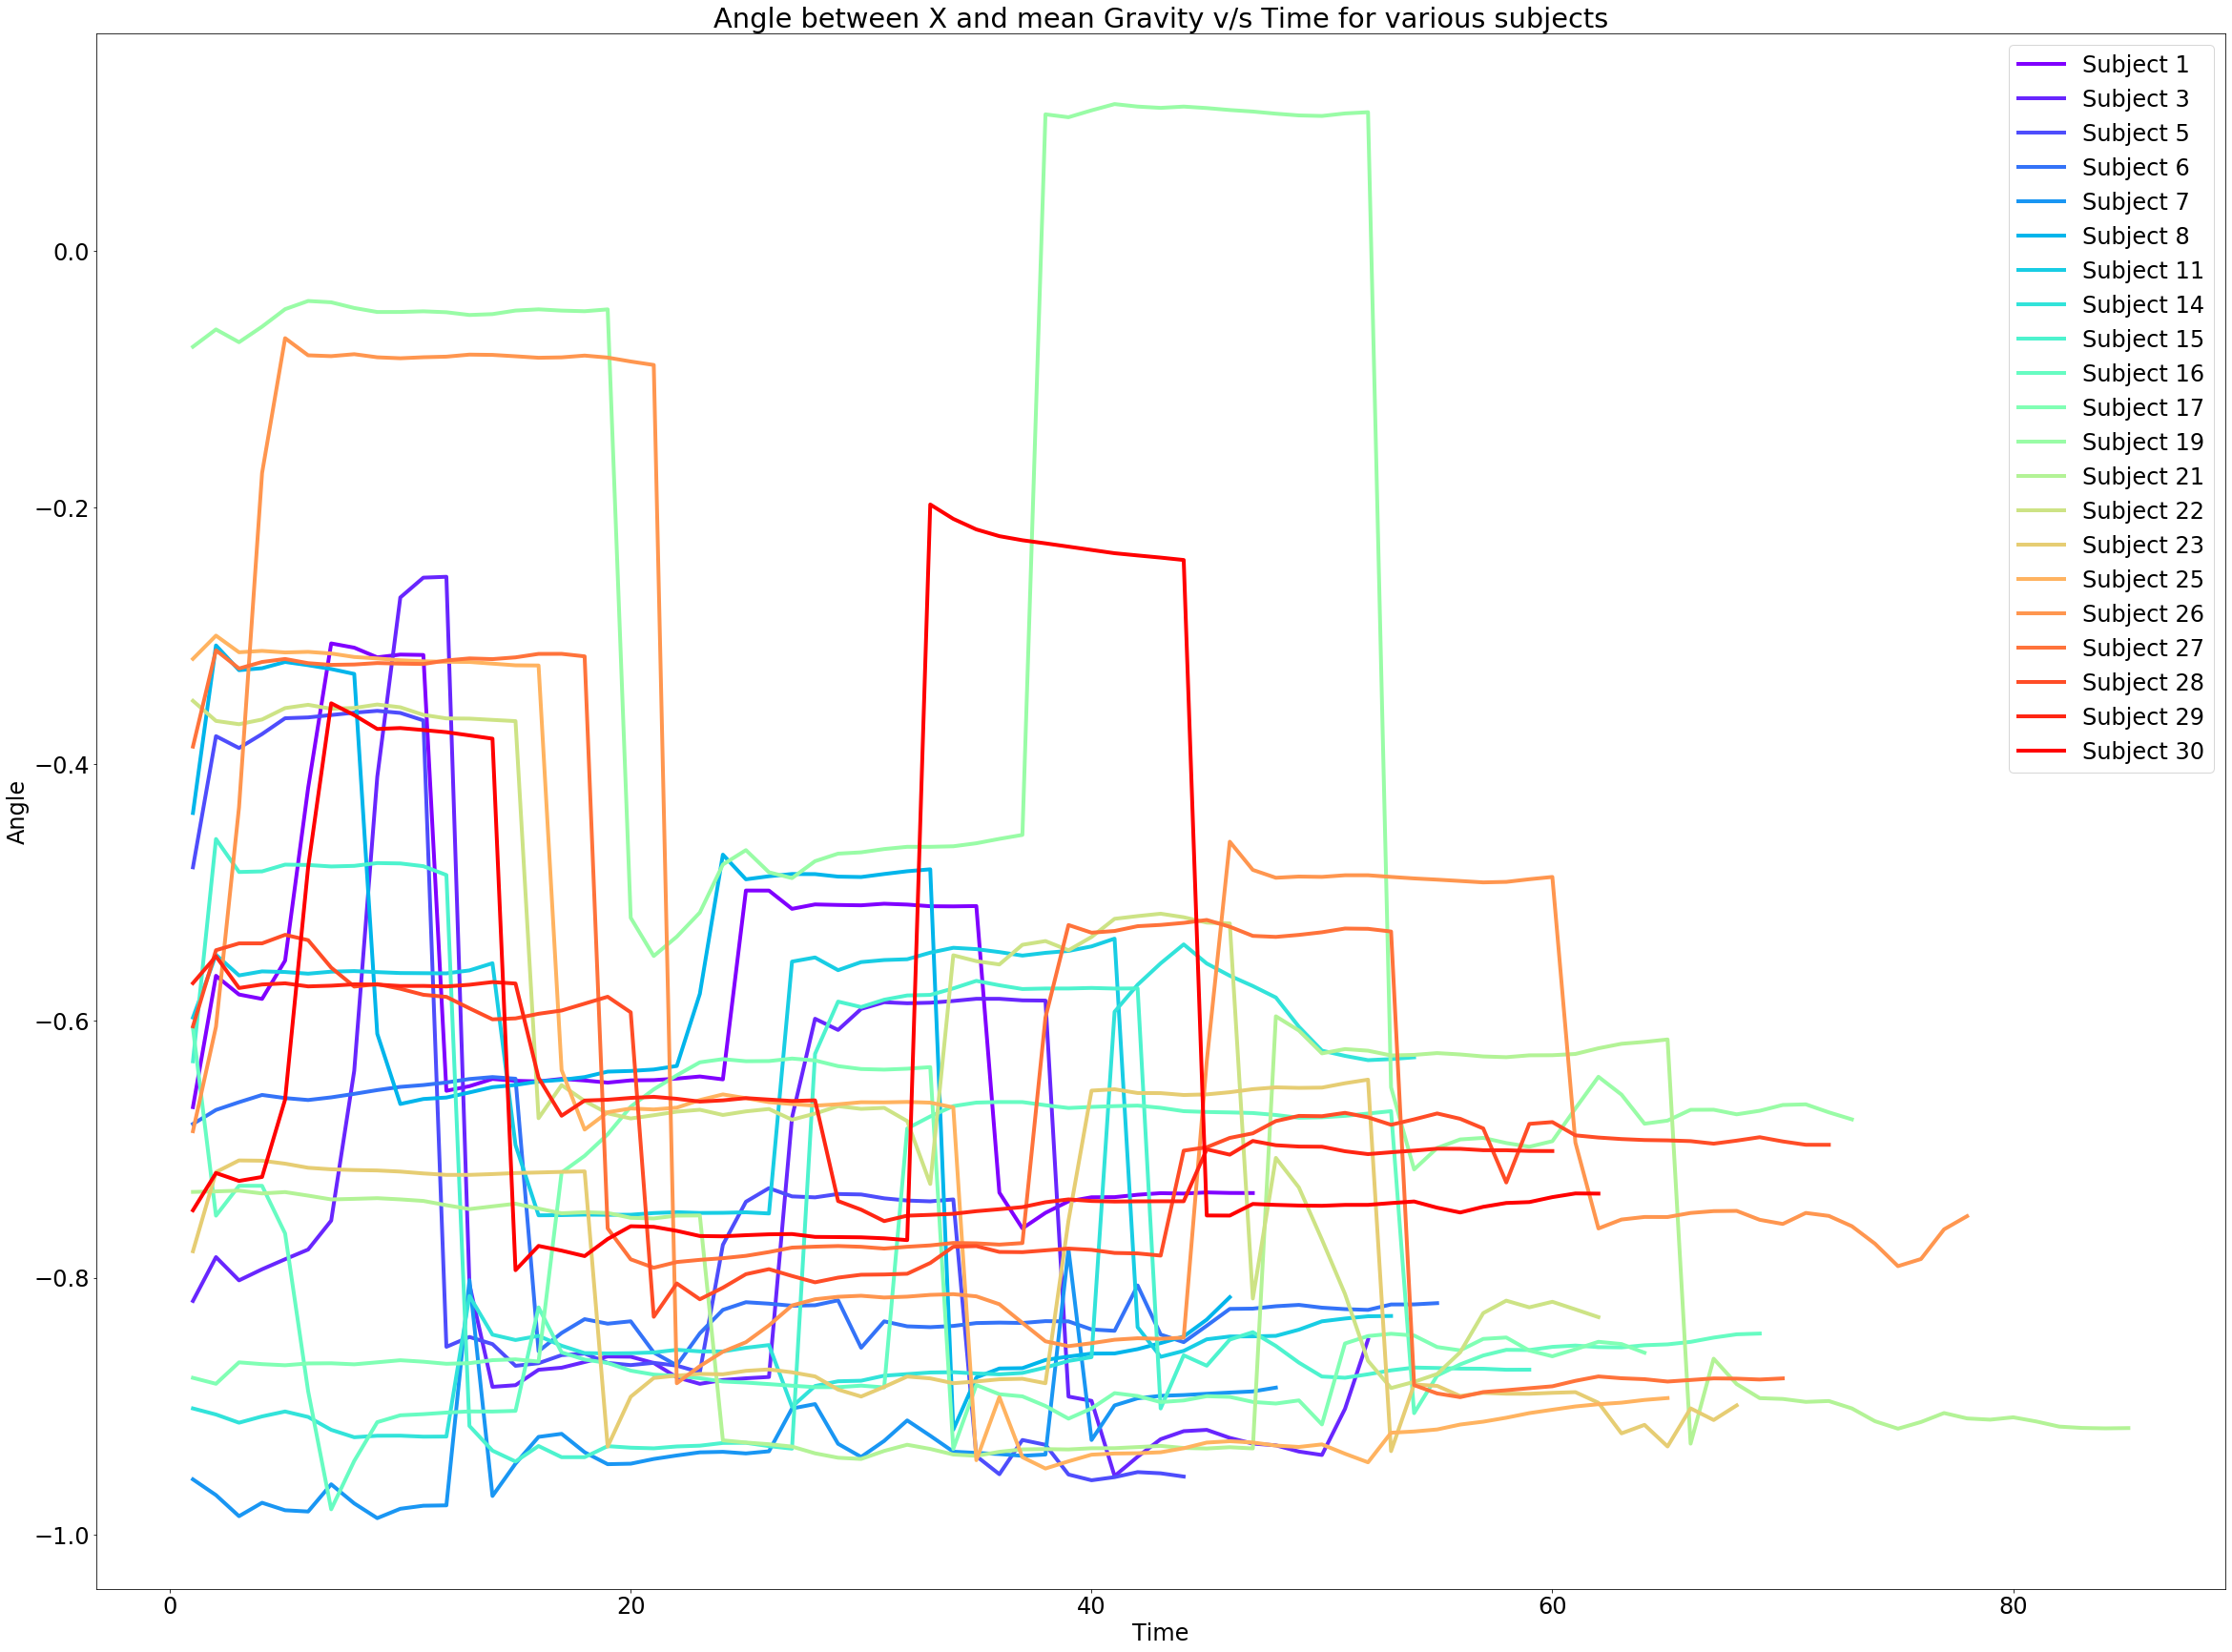

In [15]:
colors = cm.rainbow(np.linspace(0, 1, len(sitting_activity_df['subject'].unique())))
# Create plot for each subject, which will all be displayed overlapping on one plot
id = 0
for subject in sitting_activity_df['subject'].unique():
    plt.rcParams.update({'figure.figsize': [40, 30], 'font.size': 24})
    plt.plot(sitting_activity_df[sitting_activity_df['subject'] == subject]['Time'], 
             sitting_activity_df[sitting_activity_df['subject'] == subject]['angle(X,gravityMean)'],
             c = colors[id], 
             label = 'Subject ' + str(subject),
             linewidth = 4)
    plt.xlabel('Time')
    plt.ylabel('Angle')
    plt.title('Angle between X and mean Gravity v/s Time for various subjects')
    plt.legend(prop = {'size': 24})
    id += 1

In [16]:
accuracy_scores = np.zeros(4)

In [21]:
# Logistic Regression
clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[0]))

Logistic Regression accuracy: 95.82626399728538%


C:\Users\nihar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
# Support Vector Classifier

clf = SVC().fit(X_train, y_train)

prediction = clf.predict(X_test)

accuracy_scores[1] = accuracy_score(y_test, prediction)*100

print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[1]))

Support Vector Classifier accuracy: 95.04580929759076%


In [23]:
# K Nearest Neighbors

clf = KNeighborsClassifier().fit(X_train, y_train)

prediction = clf.predict(X_test)

accuracy_scores[2] = accuracy_score(y_test, prediction)*100

print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

K Nearest Neighbors Classifier accuracy: 90.02375296912113%
